<a href="https://colab.research.google.com/github/belmont358/MinipProyecto_2/blob/main/MiniP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proyecto 2 Pruebas piloto**

# * **Punto 1:** *parte (a)*

In [ ]:
#Se cargan las librerias
from google.colab import drive
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import pairplot

## **Se carga la base de datos que contiene la matriz de caracteristicas ${\bf{X}}\in \mathbb{R}^{N\times D}$, donde N = 63 son las observaciones y D = 28 son las características.**

In [ ]:
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/LAB_TSIII2021/Miniproyecto2'

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1xGq69IhDmCBxAMKAutdm8dzdfVxpV7cu/LAB_TSIII2021/Miniproyecto2


In [ ]:
#Leemos y descomprimimos el dataset y quitamos las etiquetas para obtener la matriz X
dataSISMOS = pd.read_pickle('/content/drive/MyDrive/LAB_TSIII2021/Miniproyecto2/data.pkl')
#dataSISMOS
X=dataSISMOS.drop(columns='Tiposismo')
X

,Energia_SSA1,Energia_SSA2,Energia_SSA3,Energia_SSA4,Potencia1,Potencia2,Potencia3,Potencia4,f1,f2,f3,f4,v1,v2,v3,v4,px1,px2,px3,px4,media1,media2,media3,media4,pmin1,pmin2,pmin3,pmin4
0,0.024575,0.012438,0.010658,0.007042,-30.533246,-40.892302,-42.848502,-43.831126,1.367188,23.632812,23.632812,47.656250,262.699437,142.766635,222.048852,244.557259,-30.533246,-40.892302,-42.848502,-43.831126,-68.892227,-65.268388,-67.615660,-71.948473,-2113.234048,-2169.811700,-2145.992567,-2219.119787
1,0.027088,0.005876,0.003622,0.002572,-29.325319,-46.888533,-50.432026,-52.377260,1.367188,29.296875,29.296875,47.265625,232.186085,164.245275,90.245472,79.488227,-29.325319,-46.888533,-50.432026,-52.377260,-66.556814,-66.059024,-63.613725,-64.990445,-2164.727097,-2207.625717,-2223.480184,-2217.684818
2,0.009224,0.012262,0.008105,0.005188,-41.769146,-40.188027,-36.185518,-42.836998,37.109375,40.625000,1.367188,13.671875,146.034849,473.859394,336.783680,262.524366,-41.769146,-40.188027,-36.185518,-42.836998,-60.753119,-72.590241,-67.265521,-64.383547,-2459.812015,-2511.955492,-2467.922109,-2482.351583
3,0.009224,0.012262,0.008105,0.005188,-41.769146,-40.188027,-36.185518,-42.836998,37.109375,40.625000,1.367188,13.671875,146.034849,473.859394,336.783680,262.524366,-41.769146,-40.188027,-36.185518,-42.836998,-60.753119,-72.590241,-67.265521,-64.383547,-2459.812015,-2511.955492,-2467.922109,-2482.351583
4,0.026663,0.004696,0.002149,0.002324,-29.360821,-41.504954,-47.458401,-47.506692,1.367188,44.921875,16.601562,35.937500,307.317306,141.649622,234.281870,294.754254,-29.360821,-41.504954,-47.458401,-47.506692,-69.470631,-69.190427,-67.274413,-70.601454,-2669.063813,-2702.247451,-2695.176654,-2758.920514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.058683,0.002163,0.000707,0.000547,-28.802989,-51.410285,-56.969079,-56.535279,1.367188,12.695312,27.929688,45.312500,441.375651,305.474159,309.071389,531.377812,-28.802989,-51.410285,-56.969079,-56.535279,-73.193568,-69.993778,-73.185917,-84.465491,-2536.725328,-2587.430655,-2599.064516,-2616.636282
59,0.051770,0.002810,0.001074,0.001014,-28.380496,-51.675810,-56.635914,-56.019395,1.367188,14.453125,27.148438,44.531250,380.927992,217.910843,223.227762,413.617112,-28.380496,-51.675810,-56.635914,-56.019395,-71.717990,-68.235767,-71.569354,-82.124167,-2464.278985,-2477.258322,-2504.693863,-2505.753302
60,1.301975,0.018453,0.000781,0.000571,-16.284021,-40.369709,-56.805013,-61.494774,2.343750,11.132812,13.281250,45.117188,650.747358,369.071290,212.483855,363.383921,-16.284021,-40.369709,-56.805013,-61.494774,-73.768064,-70.142615,-74.154367,-84.848224,-1316.597783,-1369.480873,-1381.079496,-1411.615949
61,0.065599,0.002334,0.000813,0.000761,-29.103404,-50.788848,-57.548981,-56.366834,1.367188,13.085938,26.757812,45.898438,406.229892,247.800503,252.642059,452.746009,-29.103404,-50.788848,-57.548981,-56.366834,-72.813004,-69.374985,-72.683735,-83.425429,-3391.098438,-3436.143093,-3454.737915,-3485.464129


## **Se crean las funciones de etiquetas y de analisis de componentes principales**

In [ ]:
def etiquetaS():
    #Se crea la columna y etiqueta tipo sismo
    sismoLoc = ['Local','Local','Local','Local','Local','Local','Local','Local','Local','Local','Local','Local','Local','Local','Local','Local','Local','Local','Local','Local','Local']
    sismoReg = ['Regional','Regional','Regional','Regional','Regional','Regional','Regional','Regional','Regional','Regional','Regional','Regional','Regional','Regional','Regional','Regional','Regional','Regional','Regional','Regional','Regional']
    teleSismo = ['Telesismo','Telesismo','Telesismo','Telesismo','Telesismo','Telesismo','Telesismo','Telesismo','Telesismo','Telesismo','Telesismo','Telesismo','Telesismo','Telesismo','Telesismo','Telesismo','Telesismo','Telesismo','Telesismo','Telesismo','Telesismo']

    Tiposis = np.concatenate((sismoLoc,sismoReg,teleSismo))
    return Tiposis

In [ ]:
def AnalisisComponentesPrincipales(q, X): 
    pca = PCA(n_components=q) # Se seleccionan las componentes, cuyo valor sea menor a 28 caracteristicas, asi se crea el modelo PCA.
    pca.fit(X) # Entrenamos el modeloCA (Calculamos los parámetros de proyección W, autovals, autovecs).
    print("Dimensiones de X: ", X.shape)
    print("Componentes de PCA: ")
    print(pca.components_)
    #Se muestra la varianza explicada
    print("Vector de varianza explicada: ")
    print(pca.explained_variance_)
    #Se transforman los datos al espacio latente
    X_pca = pca.transform(X)
    print("Forma transformada:", X_pca.shape)
    #Se grafica la varianza explicada normalizada para verificar valores confiables de cantidad de características a tomar.
    plt.plot(np.cumsum(pca.explained_variance_)/np.sum(pca.explained_variance_))
    plt.title('Var explained normalized')
    #Se aplica la ttrasformada inversa para calcular nuevamente las caracteristicas del espacio latente en el espacio inicial.
    X_new = pca.inverse_transform(X_pca)
    #se crea nuevamente el dataframe
    dfX_new = pd.DataFrame(X_new,columns=['Energia_SSA1','Energia_SSA2','Energia_SSA3','Energia_SSA4','Potencia1','Potencia2','Potencia3','Potencia4','f1','f2','f3','f4','v1','v2','v3','v4','px1','px2','px3','px4','media1','media2','media3','media4','pmin1','pmin2','pmin3','pmin4'])
    #Se agregan nuevamente las etiquetas al dataframe
    Tiposismo = etiquetaS()
    dfX_new['Tiposismo'] = Tiposismo
    dfX_new0 = dfX_new[['Potencia4','pmin1','pmin2','pmin3','pmin4','Tiposismo']]
    dfX_new1 = dfX_new[['media4','pmin1','pmin2','pmin3','pmin4','Tiposismo']]
    dfX_new2 = dfX_new[['px4','pmin1','pmin2','pmin3','pmin4','Tiposismo']]
    dfX_new3 = dfX_new[['v4','pmin1','pmin2','pmin3','pmin4','Tiposismo']]
    #Se observan los resultados de la matriz de caracteristicas una vez obtenidos los nuevos valores de dimensionalidad.
    pairplot(dfX_new0,hue = 'Tiposismo')
    pairplot(dfX_new1,hue = 'Tiposismo')
    pairplot(dfX_new2,hue = 'Tiposismo')
    pairplot(dfX_new3,hue = 'Tiposismo')
    return X_new

## **Se llama la funcion para hacer los calculos correspondientes de PCA, enviando como entradas q y la matriz X.**

Dimensiones de X:  (63, 28)
Componentes de PCA: 
[[ 2.10622652e-05  6.36136635e-06  4.18771145e-06  3.87024180e-06
  -1.00699482e-04  4.22593817e-04  4.48980095e-04  5.37245030e-04
   1.68856598e-04 -4.12761268e-05  3.24120077e-04  1.14676063e-03
   7.18844887e-03  6.14445660e-03 -4.52438683e-03 -2.53854878e-03
  -1.00699482e-04  4.22593817e-04  4.48980095e-04  5.37245030e-04
   2.18678825e-04  3.41262223e-04  5.27770403e-04  4.18998034e-04
   5.00235556e-01  4.97466025e-01  5.01688541e-01  5.00480549e-01]
 [ 4.92493109e-04  5.83965865e-05  1.07945551e-05  2.37464226e-05
   1.41004550e-02 -9.44959437e-03 -3.17391504e-02 -1.51785555e-02
  -2.30744962e-02 -4.23700800e-02  1.77256827e-02  1.87908119e-02
   4.52764896e-01  1.55442530e-01  1.35225937e-01  8.59052578e-01
   1.41004550e-02 -9.44959437e-03 -3.17391504e-02 -1.51785555e-02
  -1.51646100e-02 -6.48615118e-03 -1.08967528e-02 -3.73760809e-02
   6.59939944e-02 -5.89993855e-05 -2.95413085e-02 -3.90074343e-02]]
Vector de varianza expli

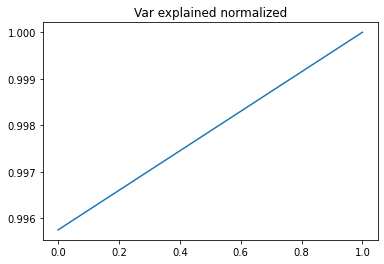

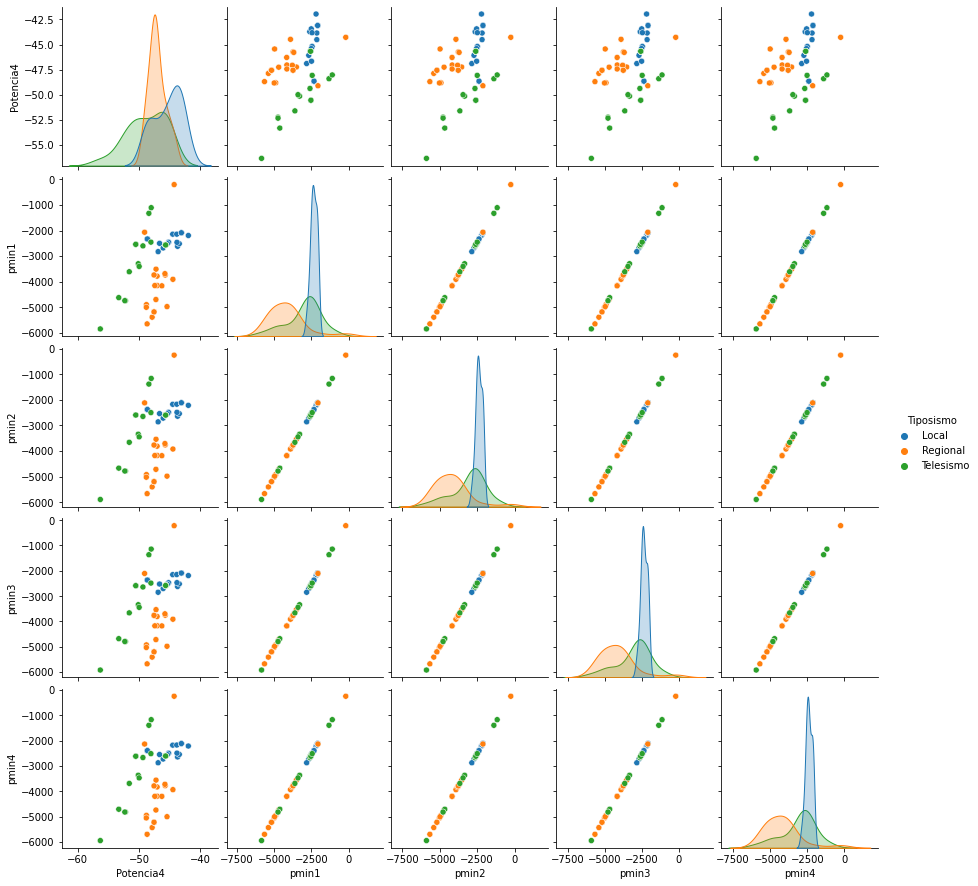

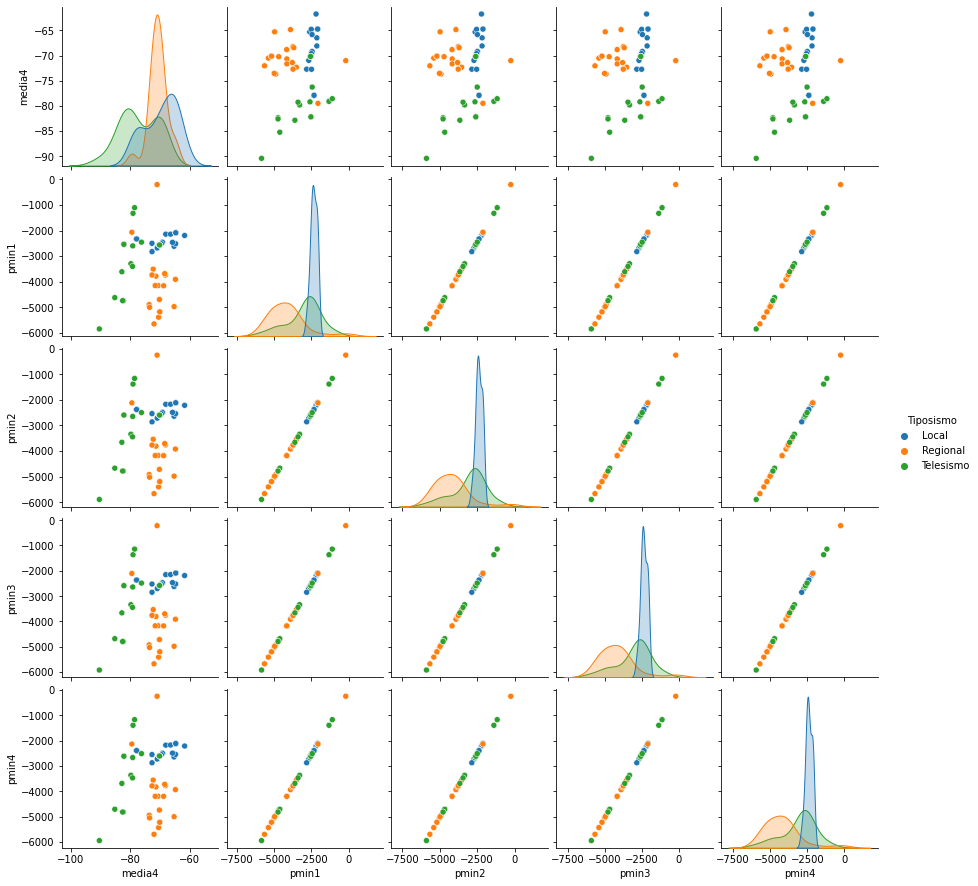

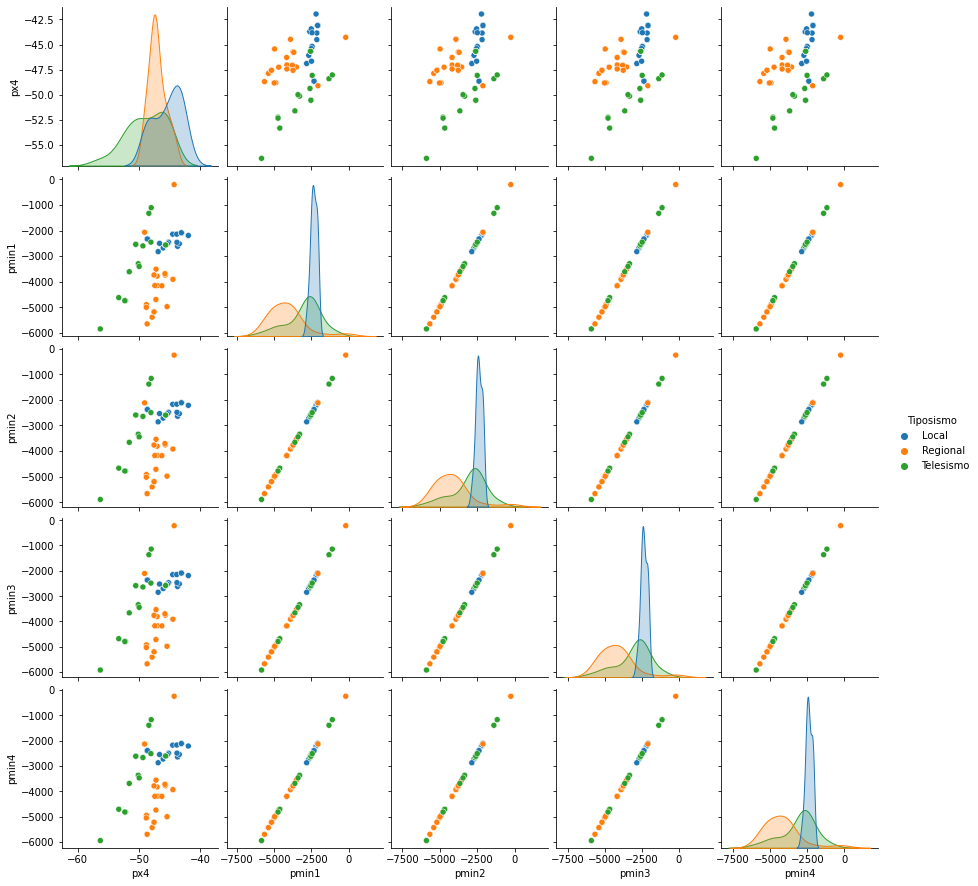

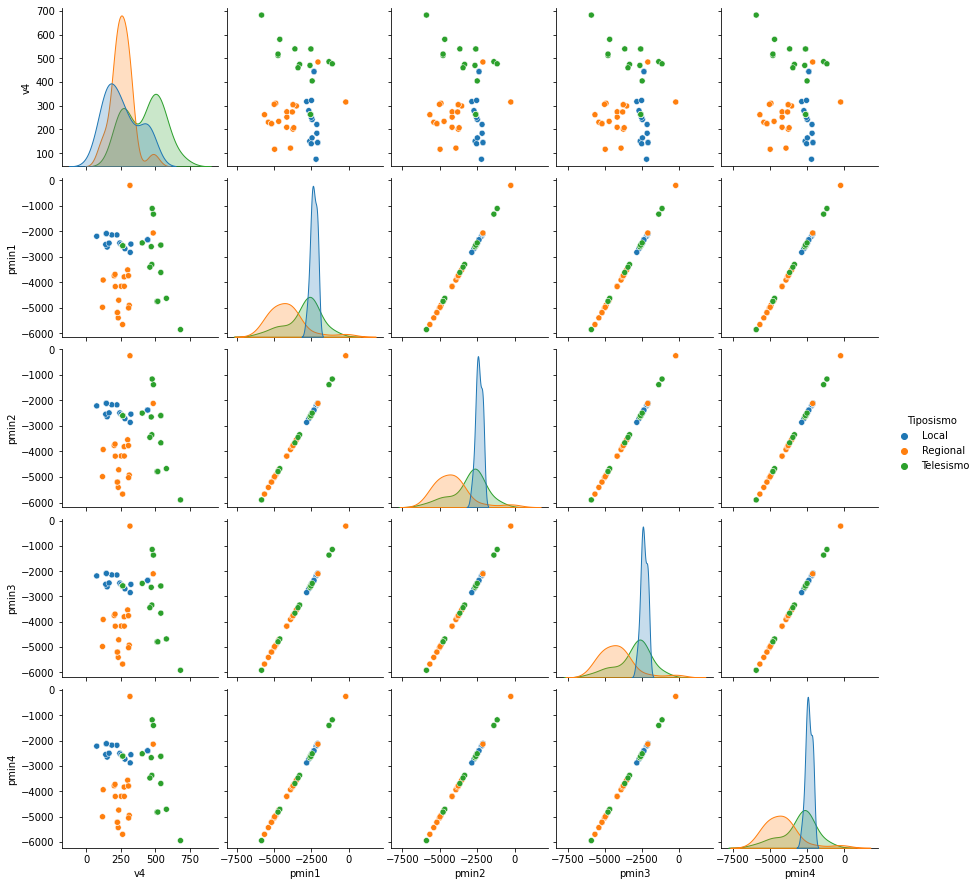

In [ ]:
#Caso para q = 2
man=AnalisisComponentesPrincipales(2, X)

Dimensiones de X:  (63, 28)
Componentes de PCA: 
[[ 2.10622652e-05  6.36136635e-06  4.18771145e-06  3.87024180e-06
  -1.00699482e-04  4.22593817e-04  4.48980095e-04  5.37245030e-04
   1.68856598e-04 -4.12761268e-05  3.24120077e-04  1.14676063e-03
   7.18844887e-03  6.14445660e-03 -4.52438683e-03 -2.53854878e-03
  -1.00699482e-04  4.22593817e-04  4.48980095e-04  5.37245030e-04
   2.18678825e-04  3.41262223e-04  5.27770403e-04  4.18998034e-04
   5.00235556e-01  4.97466025e-01  5.01688541e-01  5.00480549e-01]
 [ 4.92493109e-04  5.83965865e-05  1.07945551e-05  2.37464226e-05
   1.41004550e-02 -9.44959437e-03 -3.17391504e-02 -1.51785555e-02
  -2.30744962e-02 -4.23700800e-02  1.77256827e-02  1.87908119e-02
   4.52764896e-01  1.55442530e-01  1.35225937e-01  8.59052578e-01
   1.41004550e-02 -9.44959437e-03 -3.17391504e-02 -1.51785555e-02
  -1.51646100e-02 -6.48615118e-03 -1.08967528e-02 -3.73760809e-02
   6.59939944e-02 -5.89993855e-05 -2.95413085e-02 -3.90074343e-02]
 [ 1.34563130e-04  1.4455

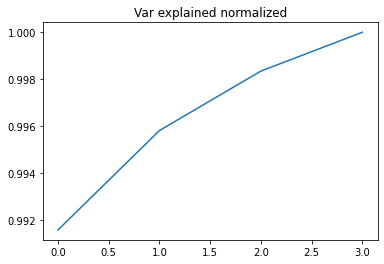

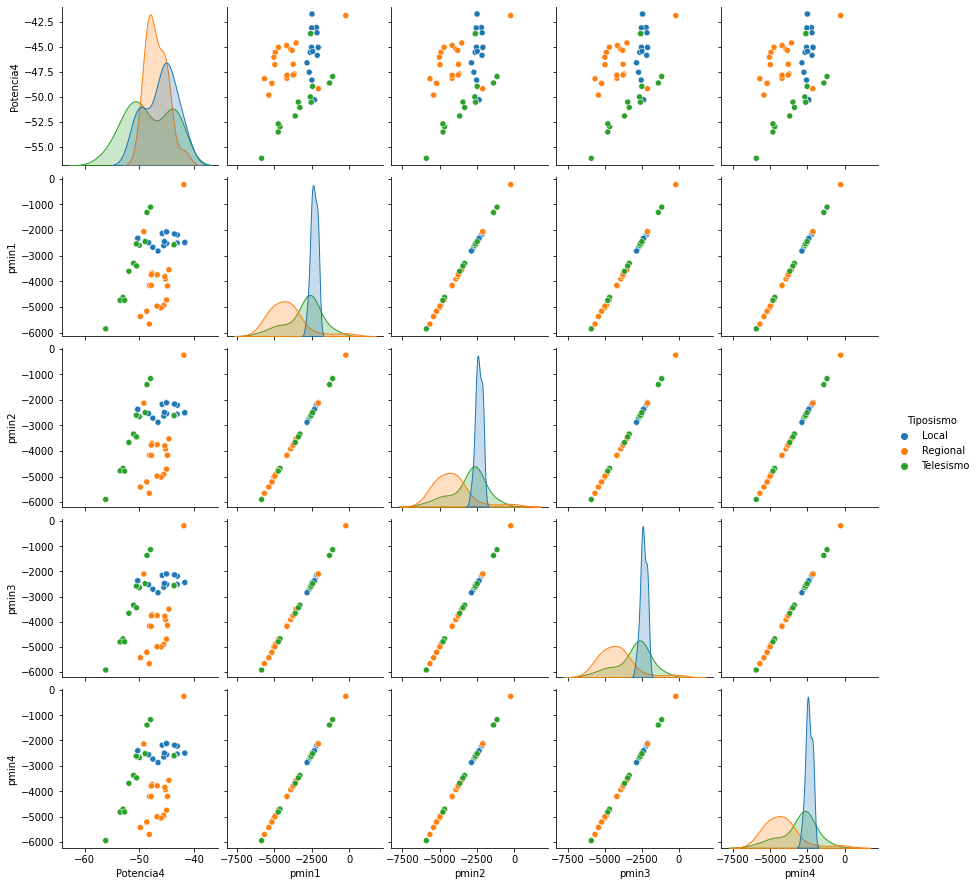

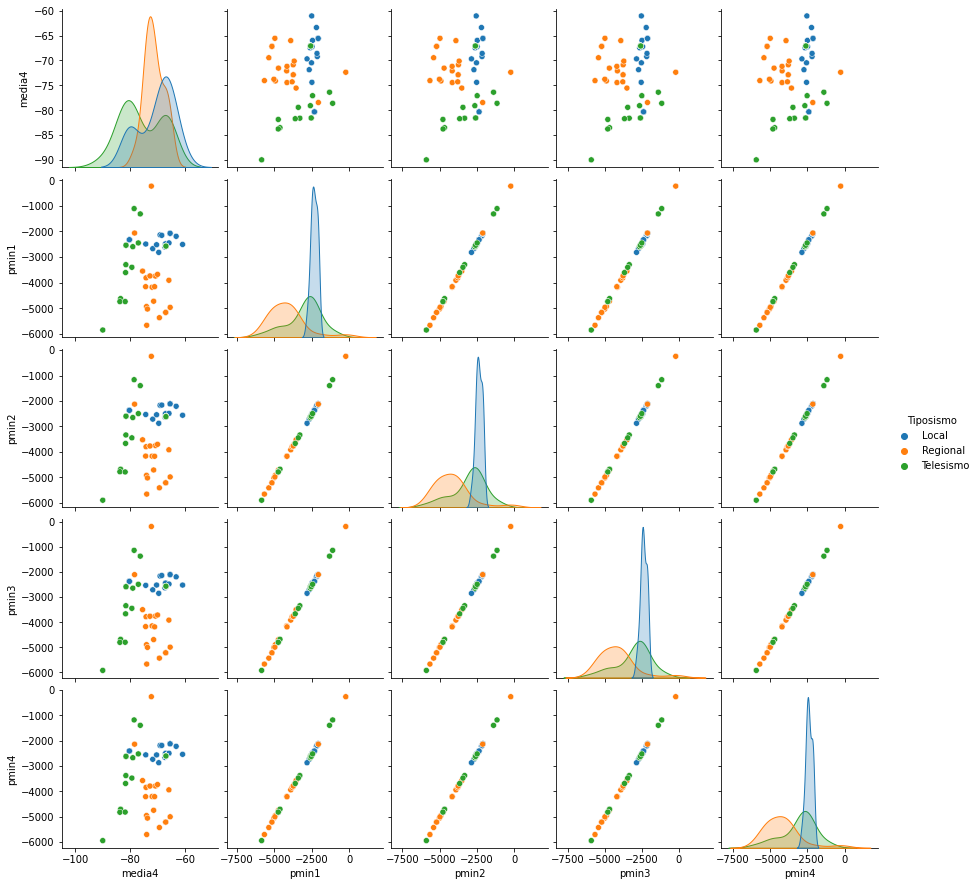

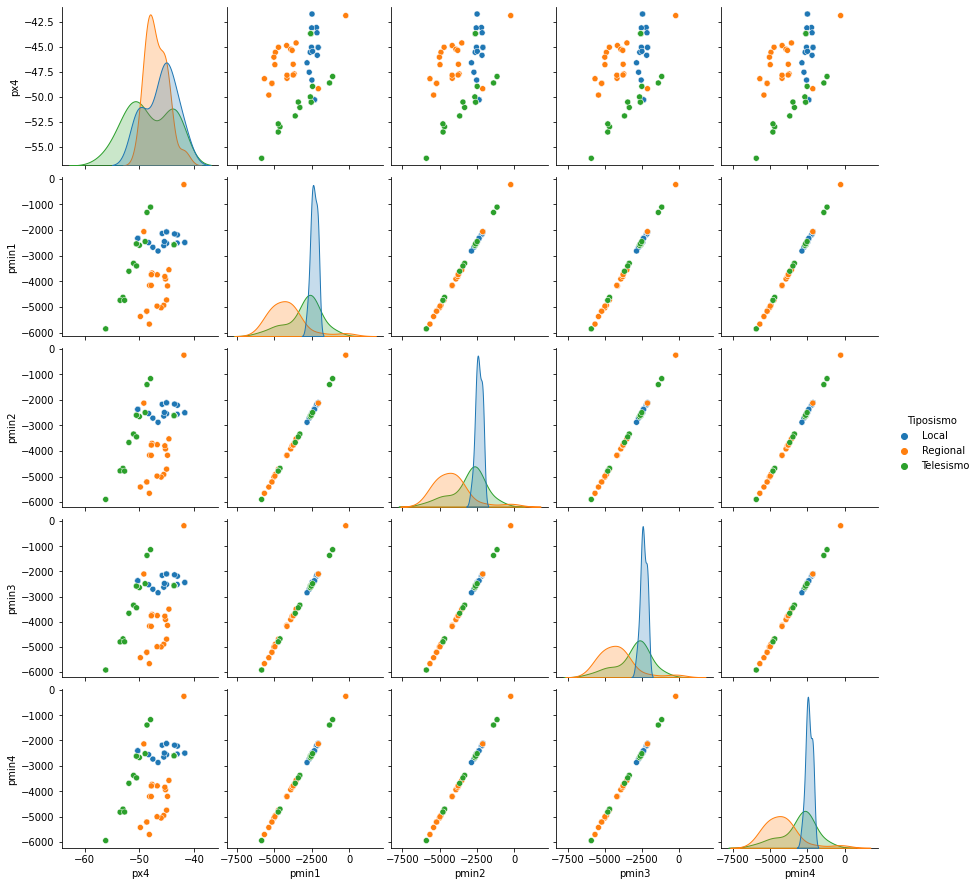

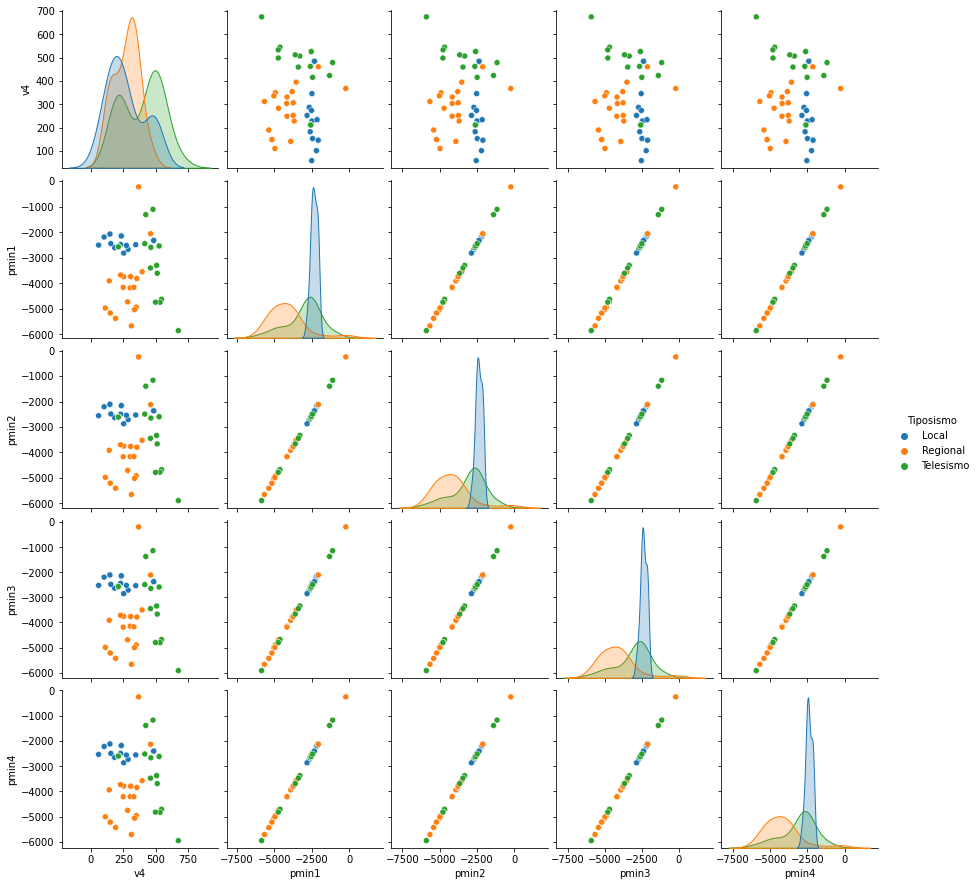

In [ ]:
#Caso para q = 4
man1=AnalisisComponentesPrincipales(4, X)

Dimensiones de X:  (63, 28)
Componentes de PCA: 
[[ 2.10622652e-05  6.36136635e-06  4.18771145e-06  3.87024180e-06
  -1.00699482e-04  4.22593817e-04  4.48980095e-04  5.37245030e-04
   1.68856598e-04 -4.12761268e-05  3.24120077e-04  1.14676063e-03
   7.18844887e-03  6.14445660e-03 -4.52438683e-03 -2.53854878e-03
  -1.00699482e-04  4.22593817e-04  4.48980095e-04  5.37245030e-04
   2.18678825e-04  3.41262223e-04  5.27770403e-04  4.18998034e-04
   5.00235556e-01  4.97466025e-01  5.01688541e-01  5.00480549e-01]
 [ 4.92493109e-04  5.83965865e-05  1.07945551e-05  2.37464226e-05
   1.41004550e-02 -9.44959437e-03 -3.17391504e-02 -1.51785555e-02
  -2.30744962e-02 -4.23700800e-02  1.77256827e-02  1.87908119e-02
   4.52764896e-01  1.55442530e-01  1.35225937e-01  8.59052578e-01
   1.41004550e-02 -9.44959437e-03 -3.17391504e-02 -1.51785555e-02
  -1.51646100e-02 -6.48615118e-03 -1.08967528e-02 -3.73760809e-02
   6.59939944e-02 -5.89993855e-05 -2.95413085e-02 -3.90074343e-02]
 [ 1.34563130e-04  1.4455

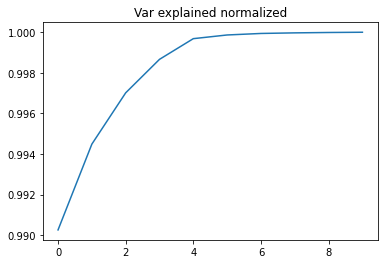

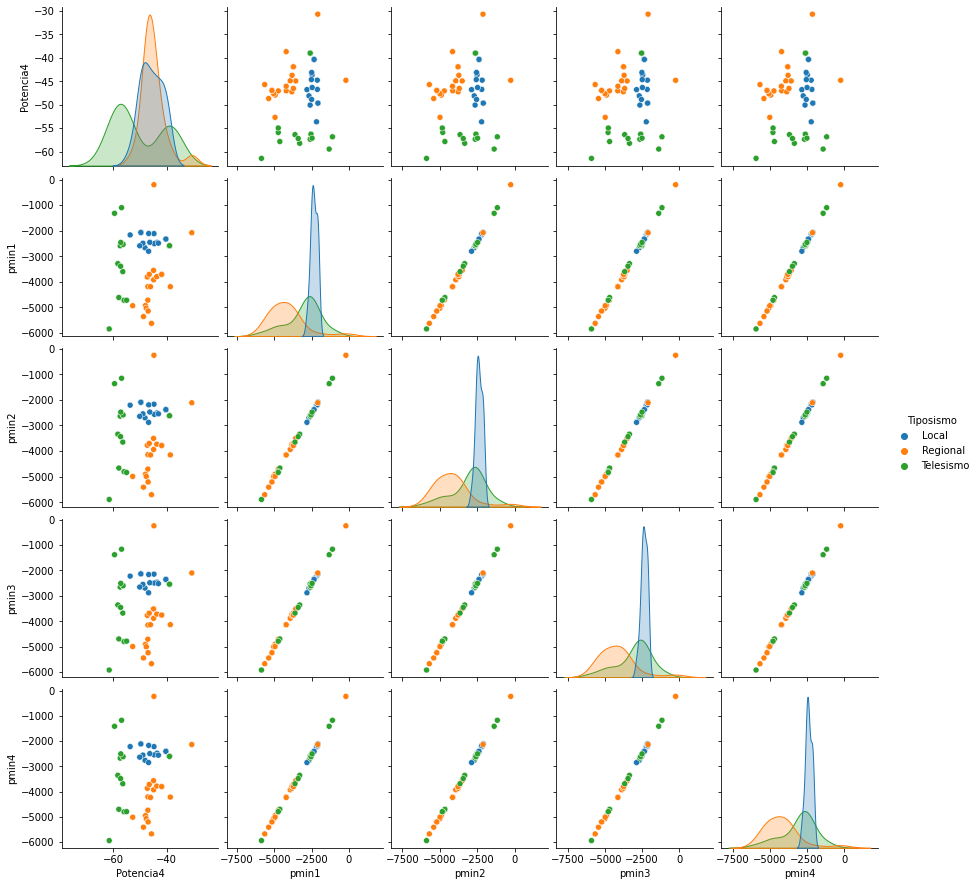

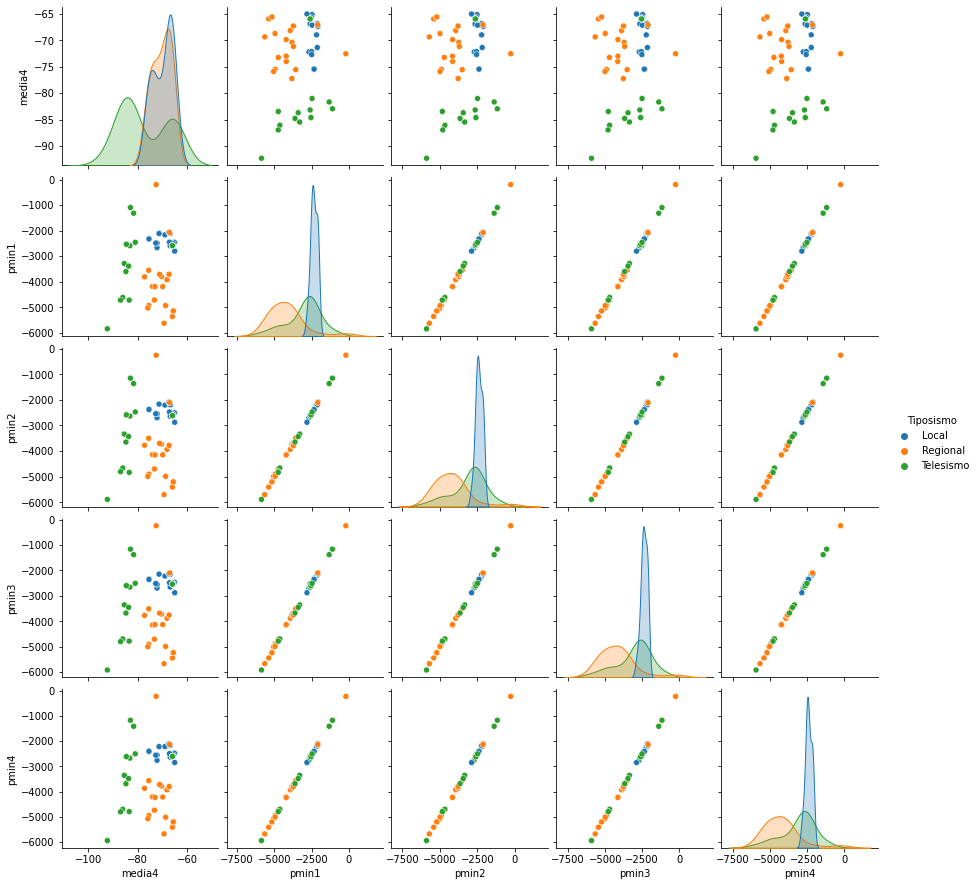

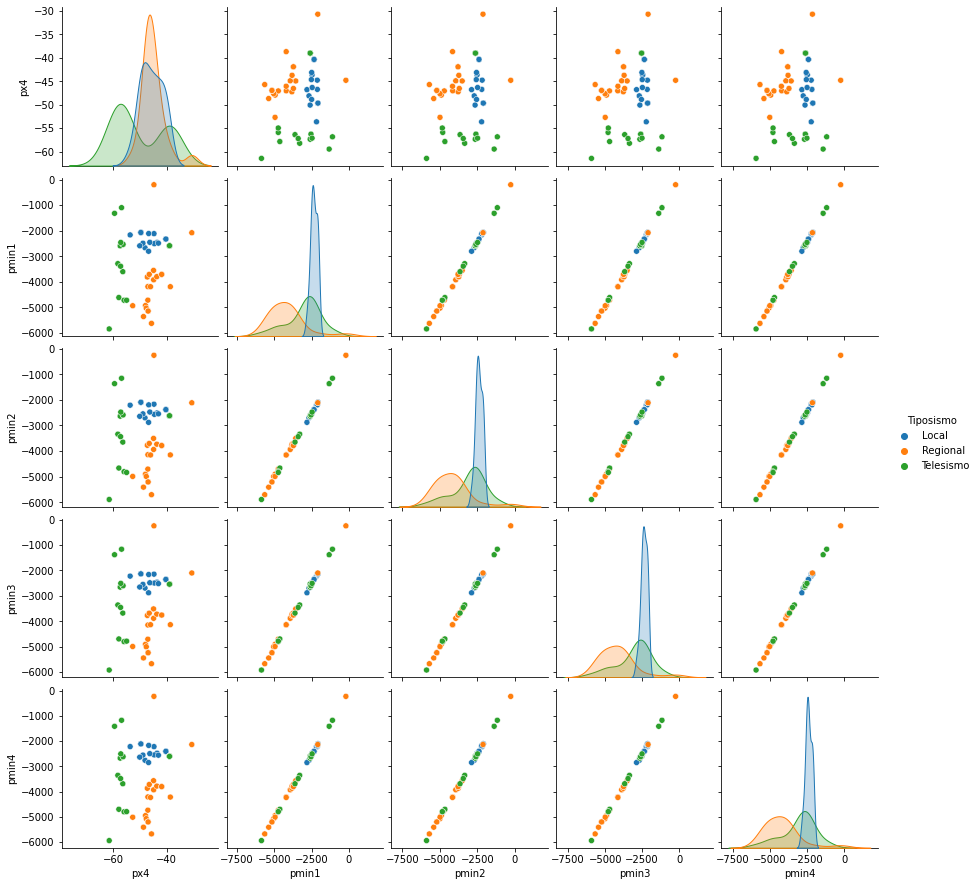

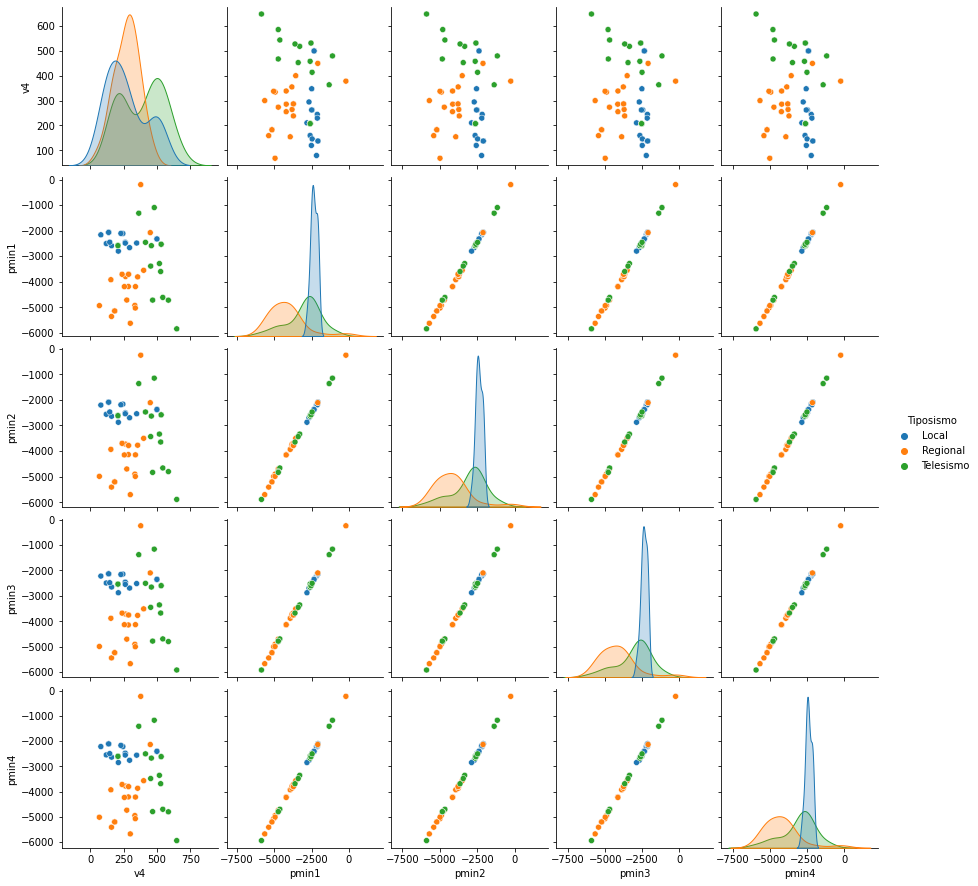

In [ ]:
#Caso para q = 8
man2=AnalisisComponentesPrincipales(10, X)

Dimensiones de X:  (63, 28)
Componentes de PCA: 
[[ 2.10622652e-05  6.36136635e-06  4.18771145e-06  3.87024180e-06
  -1.00699482e-04  4.22593817e-04  4.48980095e-04  5.37245030e-04
   1.68856598e-04 -4.12761268e-05  3.24120077e-04  1.14676063e-03
   7.18844887e-03  6.14445660e-03 -4.52438683e-03 -2.53854878e-03
  -1.00699482e-04  4.22593817e-04  4.48980095e-04  5.37245030e-04
   2.18678825e-04  3.41262223e-04  5.27770403e-04  4.18998034e-04
   5.00235556e-01  4.97466025e-01  5.01688541e-01  5.00480549e-01]
 [ 4.92493109e-04  5.83965865e-05  1.07945551e-05  2.37464226e-05
   1.41004550e-02 -9.44959437e-03 -3.17391504e-02 -1.51785555e-02
  -2.30744962e-02 -4.23700800e-02  1.77256827e-02  1.87908119e-02
   4.52764896e-01  1.55442530e-01  1.35225937e-01  8.59052578e-01
   1.41004550e-02 -9.44959437e-03 -3.17391504e-02 -1.51785555e-02
  -1.51646100e-02 -6.48615118e-03 -1.08967528e-02 -3.73760809e-02
   6.59939944e-02 -5.89993855e-05 -2.95413085e-02 -3.90074343e-02]
 [ 1.34563130e-04  1.4455

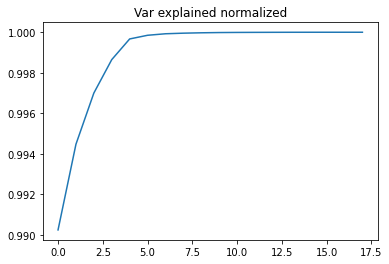

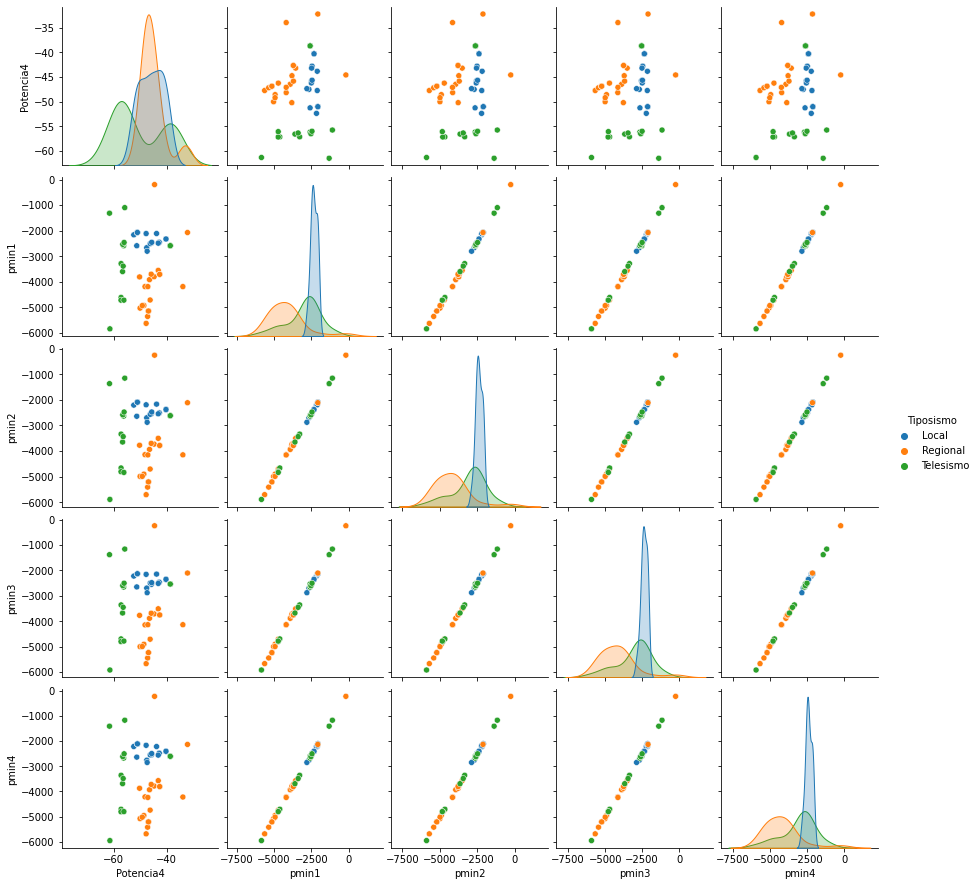

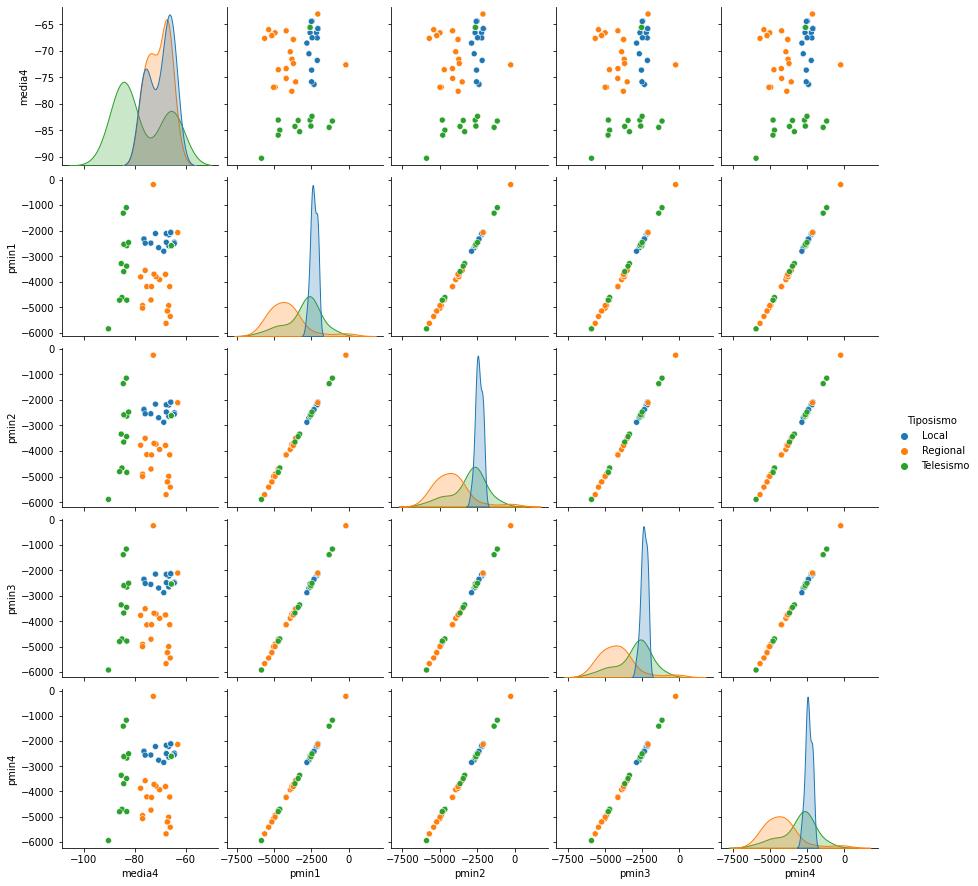

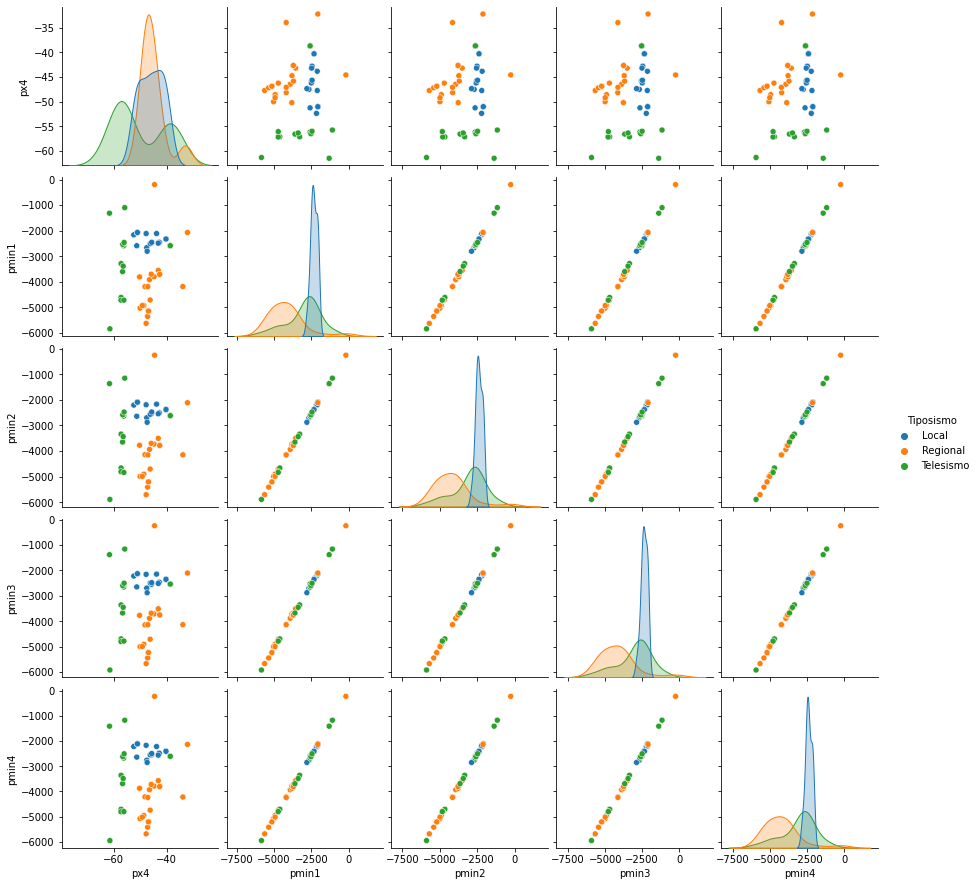

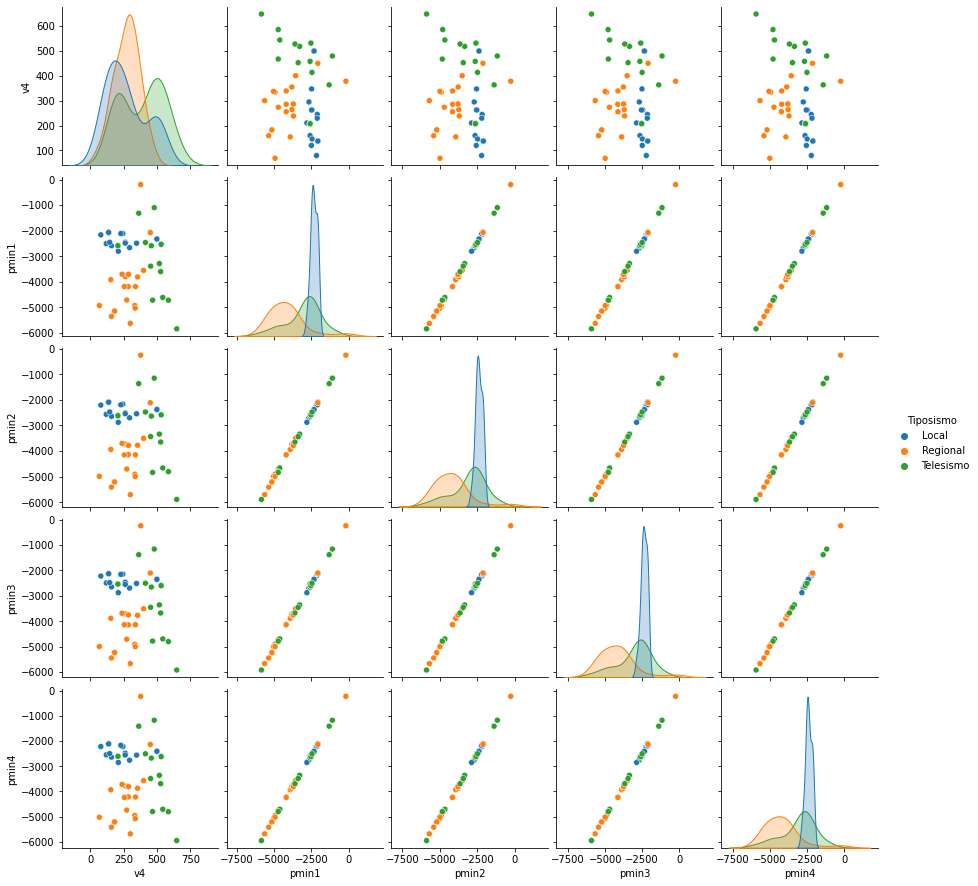

In [ ]:
man3=AnalisisComponentesPrincipales(18, X)

**Conclusion**\
- PCA permite reducir significativamente el la cantidad de ejes necesarios para el espacio muestral.
-La varianza explicada es un indicador bastante util para determinar la cantidad de componentes necesarias para representar fielmente la señal.


#**Punto 1 parte b:**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in true_divide


Accuracy:  0.3333333333333333


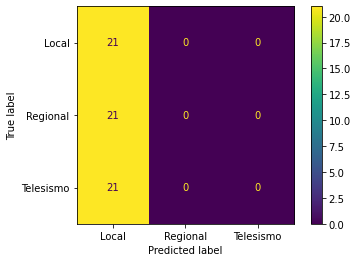

In [ ]:
# Datos en el espacio de entrada
Xtotal = dataSISMOS
X = np.asarray(Xtotal.drop('Tiposismo',1))
#t = np.asarray(Xtotal['Tiposismo'])
t = np.concatenate((0*np.ones(21),1*np.ones(21),2*np.ones(21)))
# Probabilidades de pertenencia
pC1 = np.sum(np.where(t == 0, 1., 0.)) / len(t)
pC2 = np.sum(np.where(t == 1, 1., 0.)) / len(t)
pC3 = np.sum(np.where(t == 2, 1., 0.)) / len(t)
# Seleccionamos los X de la clase 1
X1 = X[t == 0]
mu_C1 = np.mean(X1,axis = 0)
# Seleccionamos los X de la clase 2
X2 = X[t == 1]
mu_C2 = np.mean(X2,axis = 0)
# Seleccionamos los X de la clase 3
X3 = X[t == 2]
mu_C3 = np.mean(X3,axis = 0)
# Matrices de covarianza
N1 = np.sum(np.where(t == 0, 1., 0.))
MU_1 = np.tile(mu_C1,(np.int(N1),1))
S1 = (1/N1)*((X1-MU_1).T)@(X1-MU_1)
N2 = np.sum(np.where(t == 1, 1., 0.))
MU_2 = np.tile(mu_C2,(np.int(N2),1))
S2 = (1/N2)*((X2-MU_2).T)@(X2-MU_2)
N3 = np.sum(np.where(t == 2, 1., 0.))
MU_3 = np.tile(mu_C3,(np.int(N3),1))
S3 = (1/N3)*((X3-MU_3).T)@(X3-MU_3)

N = N1 + N2 + N3
Sigma = (N1/N)*S1 + (N2/N)*S2 + (N3/N)*S3

invSigma = np.linalg.pinv(Sigma)
w_C1 = invSigma@mu_C1
w_10 = -0.5*((mu_C1).T)@(invSigma@mu_C1) + np.log(pC1)
w_C2 = invSigma@mu_C2
w_20 = -0.5*((mu_C2).T)@(invSigma@mu_C2) + np.log(pC2)

w_C3 = invSigma@mu_C3
w_30 = -0.5*((mu_C3).T)@(invSigma@mu_C3) + np.log(pC3)

# Para las activaciones

A1 = (X@w_C1 + w_10).reshape(np.int(N),1)
A2 = (X@w_C2 + w_20).reshape(np.int(N),1)
A3 = (X@w_C3 + w_30).reshape(np.int(N),1)

A = np.concatenate((A1,A2,A3),axis = 1)

expA = np.exp(A)
aux = np.sum(expA,axis = 1).reshape(int(N),1)
auxM = np.tile(aux,(1,3))
p_Ck_dado_X =  expA/auxM # Posterior: y_Est

t_Est = np.argmax(p_Ck_dado_X, axis = 1)

Acc = accuracy_score(t,t_Est)
cMat = confusion_matrix(t,t_Est)

print('Accuracy: ',Acc)

ax = ConfusionMatrixDisplay(cMat, display_labels = ['Local','Regional','Telesismo'])
ax.plot()
plt.show()

Accuracy:  0.7619047619047619


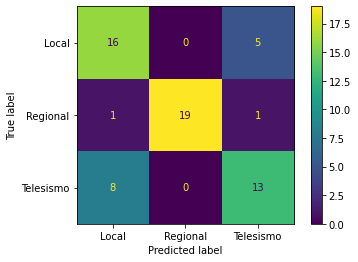

In [ ]:
# Modelo de clasificación Bayesiano para datos en el primer espacio latente q=2

Xtotal = dataSISMOS
X = man

t = np.concatenate((0*np.ones(21),1*np.ones(21),2*np.ones(21)))

# Probabilidades de pertenencia
pC1 = np.sum(np.where(t == 0, 1., 0.)) / len(t)
pC2 = np.sum(np.where(t == 1, 1., 0.)) / len(t)
pC3 = np.sum(np.where(t == 2, 1., 0.)) / len(t)
# Seleccionamos los X de la clase 1
X1 = X[t == 0]
mu_C1 = np.mean(X1,axis = 0)
# Seleccionamos los X de la clase 2
X2 = X[t == 1]
mu_C2 = np.mean(X2,axis = 0)
# Seleccionamos los X de la clase 3
X3 = X[t == 2]
mu_C3 = np.mean(X3,axis = 0)
# Matrices de covarianza
N1 = np.sum(np.where(t == 0, 1., 0.))
MU_1 = np.tile(mu_C1,(np.int(N1),1))
S1 = (1/N1)*((X1-MU_1).T)@(X1-MU_1)
N2 = np.sum(np.where(t == 1, 1., 0.))
MU_2 = np.tile(mu_C2,(np.int(N2),1))
S2 = (1/N2)*((X2-MU_2).T)@(X2-MU_2)
N3 = np.sum(np.where(t == 2, 1., 0.))
MU_3 = np.tile(mu_C3,(np.int(N3),1))
S3 = (1/N3)*((X3-MU_3).T)@(X3-MU_3)

N = N1 + N2 + N3
Sigma = (N1/N)*S1 + (N2/N)*S2 + (N3/N)*S3

invSigma = np.linalg.pinv(Sigma)
w_C1 = invSigma@mu_C1
w_10 = -0.5*((mu_C1).T)@(invSigma@mu_C1) + np.log(pC1)

w_C2 = invSigma@mu_C2
w_20 = -0.5*((mu_C2).T)@(invSigma@mu_C2) + np.log(pC2)

w_C3 = invSigma@mu_C3
w_30 = -0.5*((mu_C3).T)@(invSigma@mu_C3) + np.log(pC3)

# Para las activaciones

A1 = (X@w_C1 + w_10).reshape(np.int(N),1)
A2 = (X@w_C2 + w_20).reshape(np.int(N),1)
A3 = (X@w_C3 + w_30).reshape(np.int(N),1)

A = np.concatenate((A1,A2,A3),axis = 1)

expA = np.exp(A)
aux = np.sum(expA,axis = 1).reshape(int(N),1)
auxM = np.tile(aux,(1,3))

p_Ck_dado_X =  expA/auxM # Posterior: y_Est

t_Est = np.argmax(p_Ck_dado_X, axis = 1)

Acc = accuracy_score(t,t_Est)
cMat = confusion_matrix(t,t_Est)

print('Accuracy: ',Acc)

ax = ConfusionMatrixDisplay(cMat, display_labels = ['Local','Regional','Telesismo'])
ax.plot()
plt.show()

Accuracy:  0.8888888888888888


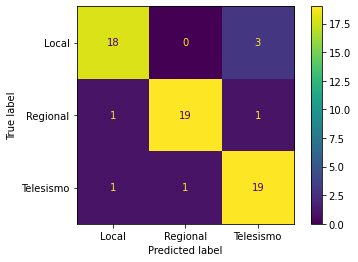

In [ ]:
# Modelo de clasificación Bayesiano para datos en el segundo espacio latente q=4

Xtotal = dataSISMOS

X = man1
#t = np.asarray(Xtotal['Tiposismo'])
t = np.concatenate((0*np.ones(21),1*np.ones(21),2*np.ones(21)))

# Probabilidades de pertenencia
pC1 = np.sum(np.where(t == 0, 1., 0.)) / len(t)
pC2 = np.sum(np.where(t == 1, 1., 0.)) / len(t)
pC3 = np.sum(np.where(t == 2, 1., 0.)) / len(t)
# Seleccionamos los X de la clase 1
X1 = X[t == 0]
mu_C1 = np.mean(X1,axis = 0)
# Seleccionamos los X de la clase 2
X2 = X[t == 1]
mu_C2 = np.mean(X2,axis = 0)
# Seleccionamos los X de la clase 3
X3 = X[t == 2]
mu_C3 = np.mean(X3,axis = 0)
# Matrices de covarianza
N1 = np.sum(np.where(t == 0, 1., 0.))
MU_1 = np.tile(mu_C1,(np.int(N1),1))
S1 = (1/N1)*((X1-MU_1).T)@(X1-MU_1)
N2 = np.sum(np.where(t == 1, 1., 0.))
MU_2 = np.tile(mu_C2,(np.int(N2),1))
S2 = (1/N2)*((X2-MU_2).T)@(X2-MU_2)
N3 = np.sum(np.where(t == 2, 1., 0.))
MU_3 = np.tile(mu_C3,(np.int(N3),1))
S3 = (1/N3)*((X3-MU_3).T)@(X3-MU_3)

N = N1 + N2 + N3
Sigma = (N1/N)*S1 + (N2/N)*S2 + (N3/N)*S3

invSigma = np.linalg.pinv(Sigma)
w_C1 = invSigma@mu_C1
w_10 = -0.5*((mu_C1).T)@(invSigma@mu_C1) + np.log(pC1)

w_C2 = invSigma@mu_C2
w_20 = -0.5*((mu_C2).T)@(invSigma@mu_C2) + np.log(pC2)

w_C3 = invSigma@mu_C3
w_30 = -0.5*((mu_C3).T)@(invSigma@mu_C3) + np.log(pC3)

# Para las activaciones

A1 = (X@w_C1 + w_10).reshape(np.int(N),1)
A2 = (X@w_C2 + w_20).reshape(np.int(N),1)
A3 = (X@w_C3 + w_30).reshape(np.int(N),1)

A = np.concatenate((A1,A2,A3),axis = 1)

expA = np.exp(A)
aux = np.sum(expA,axis = 1).reshape(int(N),1)
auxM = np.tile(aux,(1,3))

p_Ck_dado_X =  expA/auxM # Posterior: y_Est

t_Est = np.argmax(p_Ck_dado_X, axis = 1)

Acc = accuracy_score(t,t_Est)
cMat = confusion_matrix(t,t_Est)

print('Accuracy: ',Acc)

ax = ConfusionMatrixDisplay(cMat, display_labels = ['Local','Regional','Telesismo'])
ax.plot()
plt.show()

Accuracy:  0.9682539682539683


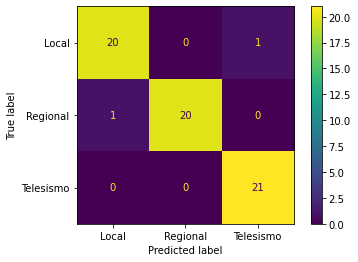

In [ ]:
# Modelo de clasificación Bayesiano para datos en el tercer espacio latente q=10

#Xtotal = dataSISMOS

X = man2
t = np.concatenate((0*np.ones(21),1*np.ones(21),2*np.ones(21)))

# Probabilidades de pertenencia
pC1 = np.sum(np.where(t == 0, 1., 0.)) / len(t)
pC2 = np.sum(np.where(t == 1, 1., 0.)) / len(t)
pC3 = np.sum(np.where(t == 2, 1., 0.)) / len(t)
# Seleccionamos los X de la clase 1
X1 = X[t == 0]
mu_C1 = np.mean(X1,axis = 0)
# Seleccionamos los X de la clase 2
X2 = X[t == 1]
mu_C2 = np.mean(X2,axis = 0)
# Seleccionamos los X de la clase 3
X3 = X[t == 2]
mu_C3 = np.mean(X3,axis = 0)
# Matrices de covarianza
N1 = np.sum(np.where(t == 0, 1., 0.))
MU_1 = np.tile(mu_C1,(np.int(N1),1))
S1 = (1/N1)*((X1-MU_1).T)@(X1-MU_1)
N2 = np.sum(np.where(t == 1, 1., 0.))
MU_2 = np.tile(mu_C2,(np.int(N2),1))
S2 = (1/N2)*((X2-MU_2).T)@(X2-MU_2)
N3 = np.sum(np.where(t == 2, 1., 0.))
MU_3 = np.tile(mu_C3,(np.int(N3),1))
S3 = (1/N3)*((X3-MU_3).T)@(X3-MU_3)

N = N1 + N2 + N3
Sigma = (N1/N)*S1 + (N2/N)*S2 + (N3/N)*S3

invSigma = np.linalg.pinv(Sigma)
w_C1 = invSigma@mu_C1
w_10 = -0.5*((mu_C1).T)@(invSigma@mu_C1) + np.log(pC1)

w_C2 = invSigma@mu_C2
w_20 = -0.5*((mu_C2).T)@(invSigma@mu_C2) + np.log(pC2)

w_C3 = invSigma@mu_C3
w_30 = -0.5*((mu_C3).T)@(invSigma@mu_C3) + np.log(pC3)

# Para las activaciones

A1 = (X@w_C1 + w_10).reshape(np.int(N),1)
A2 = (X@w_C2 + w_20).reshape(np.int(N),1)
A3 = (X@w_C3 + w_30).reshape(np.int(N),1)

A = np.concatenate((A1,A2,A3),axis = 1)

expA = np.exp(A)
aux = np.sum(expA,axis = 1).reshape(int(N),1)
auxM = np.tile(aux,(1,3))

p_Ck_dado_X =  expA/auxM # Posterior: y_Est

t_Est = np.argmax(p_Ck_dado_X, axis = 1)

Acc = accuracy_score(t,t_Est)
cMat = confusion_matrix(t,t_Est)

print('Accuracy: ',Acc)

ax = ConfusionMatrixDisplay(cMat, display_labels = ['Local','Regional','Telesismo'])
ax.plot()
plt.show()

**Conclusion**


*   Podemos notar que al ingresar los datos sin hacer el proceso de PCA el sistema no logra hacer una clacificacion confundiendo los tres tipos de señales, esto devido a la grancantidada de dedatos que se presosesa que no aportan mucha informacion.

*   Al aplicar el PCA con diferentes componentes se logra ver que se presenta una mejor clasificacion de las señales y se logra ver con el ACCURACY  llegango hasta un 96%



*   El numero de componenetes que presenta un mejor clasificacios es de 10 ya que al superar este el sistema colapsa   







/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


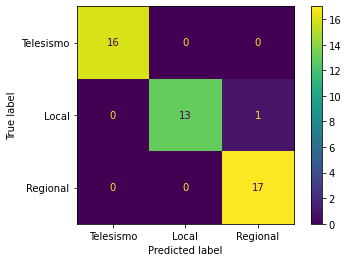

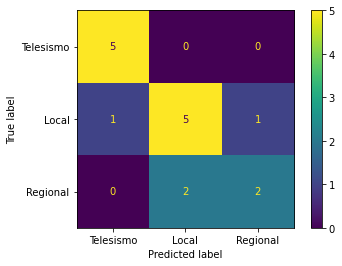

Acuracy Train:  0.9787234042553191
Acuracy Test:  0.75


In [ ]:

# Modelo de regresión logística datos sin procesar 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay 
from sklearn.model_selection import train_test_split

# Cargamos los datos
Xtotal = dataSISMOS
X = np.asarray(Xtotal.drop('Tiposismo',1))
#t = np.asarray(Xtotal['Tiposismo'])
Y = np.concatenate((0*np.ones(21),1*np.ones(21),2*np.ones(21)))

# Dividimos el conjunto de datos en Entrenamiento y Test
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 123) # Selección aleatoria utilizando validación k-fold

# Creamos un modelo de Regresión Logística para Clasificación y entrenamos los datos
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)

# Luego evaluamos el desempeño del clasificador tanto en entrenamiento cómo en test
Acc_train = accuracy_score(y_train, logreg.predict(X_train))
cMat_train = confusion_matrix(y_train, logreg.predict(X_train))
Acc_test = accuracy_score(y_test, logreg.predict(X_test))
cMat_test = confusion_matrix(y_test, logreg.predict(X_test))

ax1 = ConfusionMatrixDisplay(cMat_train, display_labels=['Telesismo','Local','Regional'])
ax1.plot()
plt.show()

ax2 = ConfusionMatrixDisplay(cMat_test, display_labels=['Telesismo','Local','Regional'])
ax2.plot()
plt.show()

print('Acuracy Train: ',Acc_train)
print('Acuracy Test: ',Acc_test)

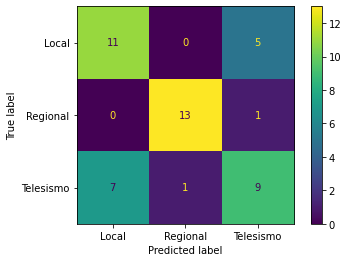

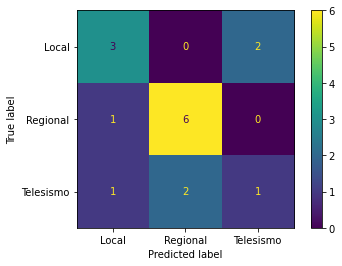

Acuracy Train:  0.7021276595744681
Acuracy Test:  0.625


In [ ]:
# Modelo de regresión logística datos CON PCA espacio latente q=2

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay 
from sklearn.model_selection import train_test_split

# Cargamos los datos
#Xtotal = dataSISMOS
X = man
#t = np.asarray(Xtotal['Tiposismo'])
Y = np.concatenate((0*np.ones(21),1*np.ones(21),2*np.ones(21)))

# Dividimos el conjunto de datos en Entrenamiento y Test
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 123) # Selección aleatoria utilizando validación k-fold

# Creamos un modelo de Regresión Logística para Clasificación y entrenamos los datos
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)

# Luego evaluamos el desempeño del clasificador tanto en entrenamiento cómo en test
Acc_train = accuracy_score(y_train, logreg.predict(X_train))
cMat_train = confusion_matrix(y_train, logreg.predict(X_train))
Acc_test = accuracy_score(y_test, logreg.predict(X_test))
cMat_test = confusion_matrix(y_test, logreg.predict(X_test))

ax1 = ConfusionMatrixDisplay(cMat_train, display_labels=['Local','Regional','Telesismo'])
ax1.plot()
plt.show()

ax2 = ConfusionMatrixDisplay(cMat_test, display_labels=['Local','Regional','Telesismo'])
ax2.plot()
plt.show()

print('Acuracy Train: ',Acc_train)
print('Acuracy Test: ',Acc_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


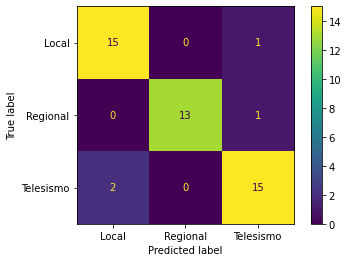

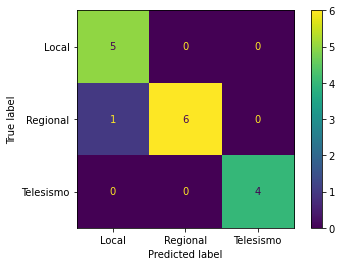

Acuracy Train:  0.9148936170212766
Acuracy Test:  0.9375


In [ ]:
# Modelo de regresión logística datos CON PCA espacio latente q=4

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay 
from sklearn.model_selection import train_test_split

# Cargamos los datos
#Xtotal = dataSISMOS
X = man1
#t = np.asarray(Xtotal['Tiposismo'])
Y = np.concatenate((0*np.ones(21),1*np.ones(21),2*np.ones(21)))

# Dividimos el conjunto de datos en Entrenamiento y Test
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 123) # Selección aleatoria utilizando validación k-fold

# Creamos un modelo de Regresión Logística para Clasificación y entrenamos los datos
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)

# Luego evaluamos el desempeño del clasificador tanto en entrenamiento cómo en test
Acc_train = accuracy_score(y_train, logreg.predict(X_train))
cMat_train = confusion_matrix(y_train, logreg.predict(X_train))
Acc_test = accuracy_score(y_test, logreg.predict(X_test))
cMat_test = confusion_matrix(y_test, logreg.predict(X_test))

ax1 = ConfusionMatrixDisplay(cMat_train, display_labels=['Local','Regional','Telesismo'])
ax1.plot()
plt.show()

ax2 = ConfusionMatrixDisplay(cMat_test, display_labels=['Local','Regional','Telesismo'])
ax2.plot()
plt.show()

print('Acuracy Train: ',Acc_train)
print('Acuracy Test: ',Acc_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


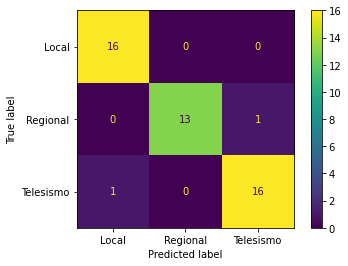

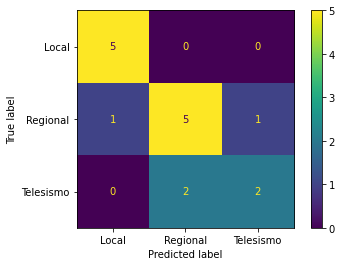

Acuracy Train:  0.9574468085106383
Acuracy Test:  0.75


In [ ]:
# Modelo de regresión logística datos CON PCA espacio latente q=10

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay 
from sklearn.model_selection import train_test_split

# Cargamos los datos
#Xtotal = dataSISMOS
X = man2
#t = np.asarray(Xtotal['Tiposismo'])
Y = np.concatenate((0*np.ones(21),1*np.ones(21),2*np.ones(21)))

# Dividimos el conjunto de datos en Entrenamiento y Test
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 123) # Selección aleatoria utilizando validación k-fold

# Creamos un modelo de Regresión Logística para Clasificación y entrenamos los datos
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)

# Luego evaluamos el desempeño del clasificador tanto en entrenamiento cómo en test
Acc_train = accuracy_score(y_train, logreg.predict(X_train))
cMat_train = confusion_matrix(y_train, logreg.predict(X_train))
Acc_test = accuracy_score(y_test, logreg.predict(X_test))
cMat_test = confusion_matrix(y_test, logreg.predict(X_test))

ax1 = ConfusionMatrixDisplay(cMat_train, display_labels=['Local','Regional','Telesismo'])
ax1.plot()
plt.show()

ax2 = ConfusionMatrixDisplay(cMat_test, display_labels=['Local','Regional','Telesismo'])
ax2.plot()
plt.show()

print('Acuracy Train: ',Acc_train)
print('Acuracy Test: ',Acc_test)

**Conclusiones:**

*   Se observa que el mejor resultado se obtiene con 4 componentes ya que para para mayores que este el ACCURANCY es menor. 

*   Por los resultados obtenidos el aumentar el numero de componentes no mejora la clasificación de las señales.


*   Al hacer la comparación con el modelo bayesiano y el logistico podemos decir que al aumentar las componentes en el bayesiano se obtienen resultados con mayor exactitud que con el de regresión logistica,

*   Al comparar los resultados con la misma cantidad de componentes del espacio latente en el bayesiano y la regresion logistica para 2 y 4 componenetes, la regresion logistica presenta un mejor desempeño.







# *Reconocimiento de rostros*

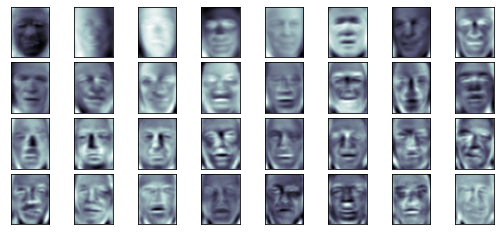

In [ ]:
# Visualización de eigenfaces para pca con 200 componentes

from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
pca = PCA(n_components = 200,svd_solver='randomized')
pca.fit(faces.data)
Wprojection = pca.components_

fig, axes = plt.subplots(4, 8, figsize=(9, 4), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(Wprojection[i].reshape(62, 47), cmap='bone')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Acuracy Train:  1.0
Acuracy Test:  0.7580246913580246


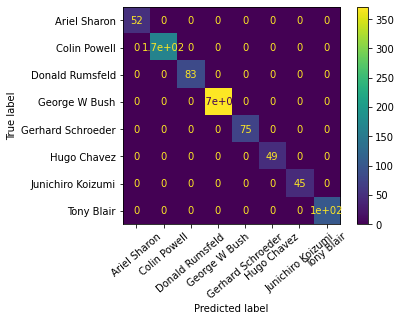

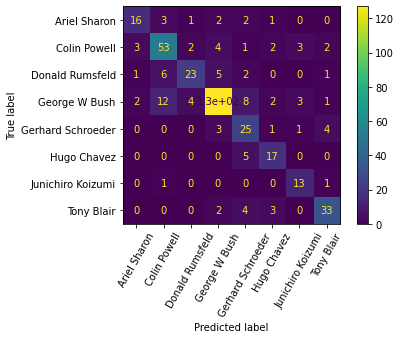

In [ ]:
# Proyectemos los X en el espacio de entrada (pixeles) al espacio latente (Componentes Principales)
X_vectores = faces.data
Z = pca.transform(X_vectores)
y = faces.target
# Ahora evaluemos la tarea del reconocimiento con los Eigenfaces
Xtrain, Xtest, ytrain, ytest = train_test_split(Z,y, test_size = 0.3, random_state = 123)
modelBayesian = LogisticRegression(C = 0.001)
modelBayesian.fit(Xtrain,ytrain)
# Realizamos la predicción tanto para train como para test
yEst_train = modelBayesian.predict(Xtrain)
yEst_test = modelBayesian.predict(Xtest)
# Analicemos el error de predicción
Acc_train = accuracy_score(ytrain, yEst_train)
cMat_train = confusion_matrix(ytrain, yEst_train)

Acc_test = accuracy_score(ytest, yEst_test)
cMat_test = confusion_matrix(ytest, yEst_test)


print('Acuracy Train: ',Acc_train)
print('Acuracy Test: ',Acc_test)

#plt.figure()
ax1 = ConfusionMatrixDisplay(cMat_train, display_labels=faces.target_names)
ax1.plot(xticks_rotation = 40)
plt.show()

ax2 = ConfusionMatrixDisplay(cMat_test, display_labels=faces.target_names)
ax2.plot(xticks_rotation = 60)
plt.show()


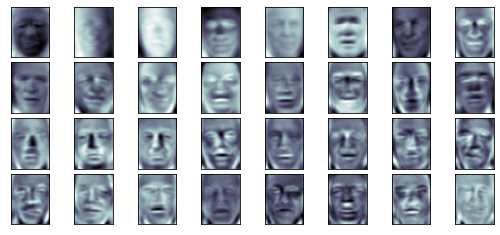

In [ ]:
# Visualización de eigenfaces para pca con 400 componentes

from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
pca = PCA(n_components = 400,svd_solver='randomized')
pca.fit(faces.data)
Wprojection = pca.components_

fig, axes = plt.subplots(4, 8, figsize=(9, 4), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(Wprojection[i].reshape(62, 47), cmap='bone')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Acuracy Train:  1.0
Acuracy Test:  0.8049382716049382


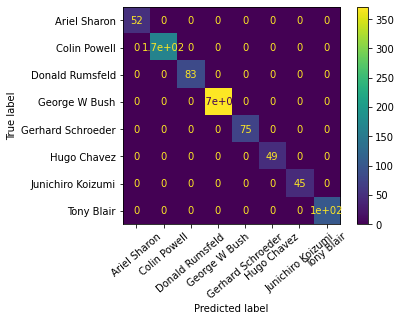

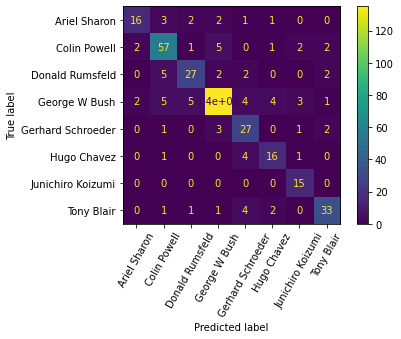

In [ ]:
# Proyectemos los X en el espacio de entrada (pixeles) al espacio latente (Componentes Principales)
X_vectores = faces.data
Z = pca.transform(X_vectores)
y = faces.target
# Ahora evaluemos la tarea del reconocimiento con los Eigenfaces
Xtrain, Xtest, ytrain, ytest = train_test_split(Z,y, test_size = 0.3, random_state = 123)
modelBayesian = LogisticRegression(C = 0.001)
modelBayesian.fit(Xtrain,ytrain)
# Realizamos la predicción tanto para train como para test
yEst_train = modelBayesian.predict(Xtrain)
yEst_test = modelBayesian.predict(Xtest)
# Analicemos el error de predicción
Acc_train = accuracy_score(ytrain, yEst_train)
cMat_train = confusion_matrix(ytrain, yEst_train)

Acc_test = accuracy_score(ytest, yEst_test)
cMat_test = confusion_matrix(ytest, yEst_test)


print('Acuracy Train: ',Acc_train)
print('Acuracy Test: ',Acc_test)

#plt.figure()
ax1 = ConfusionMatrixDisplay(cMat_train, display_labels=faces.target_names)
ax1.plot(xticks_rotation = 40)
plt.show()

ax2 = ConfusionMatrixDisplay(cMat_test, display_labels=faces.target_names)
ax2.plot(xticks_rotation = 60)
plt.show()

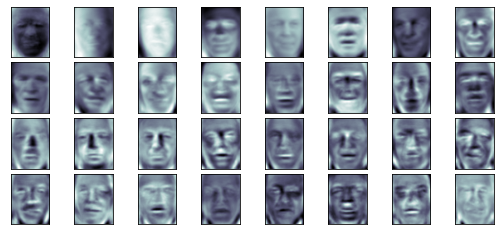

In [ ]:
# Visualización de eigenfaces para pca con 800 componentes

from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
pca = PCA(n_components = 400,svd_solver='randomized')
pca.fit(faces.data)
Wprojection = pca.components_

fig, axes = plt.subplots(4, 8, figsize=(9, 4), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(Wprojection[i].reshape(62, 47), cmap='bone')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Acuracy Train:  1.0
Acuracy Test:  0.8049382716049382


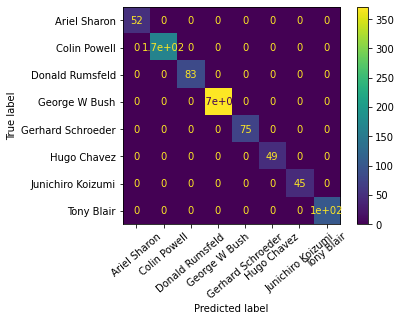

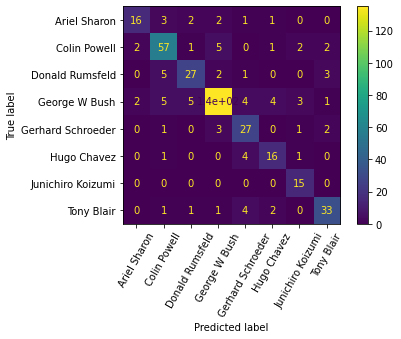

In [ ]:
# Proyectemos los X en el espacio de entrada (pixeles) al espacio latente (Componentes Principales)
X_vectores = faces.data
Z = pca.transform(X_vectores)
y = faces.target
# Ahora evaluemos la tarea del reconocimiento con los Eigenfaces
Xtrain, Xtest, ytrain, ytest = train_test_split(Z,y, test_size = 0.3, random_state = 123)
modelBayesian = LogisticRegression(C = 0.001)
modelBayesian.fit(Xtrain,ytrain)
# Realizamos la predicción tanto para train como para test
yEst_train = modelBayesian.predict(Xtrain)
yEst_test = modelBayesian.predict(Xtest)
# Analicemos el error de predicción
Acc_train = accuracy_score(ytrain, yEst_train)
cMat_train = confusion_matrix(ytrain, yEst_train)

Acc_test = accuracy_score(ytest, yEst_test)
cMat_test = confusion_matrix(ytest, yEst_test)


print('Acuracy Train: ',Acc_train)
print('Acuracy Test: ',Acc_test)

#plt.figure()
ax1 = ConfusionMatrixDisplay(cMat_train, display_labels=faces.target_names)
ax1.plot(xticks_rotation = 40)
plt.show()

ax2 = ConfusionMatrixDisplay(cMat_test, display_labels=faces.target_names)
ax2.plot(xticks_rotation = 60)
plt.show()